In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
loan_data = pd.read_csv("train.csv")
loan_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [3]:
#remove some columns as our group find it does not bring values
loan_data.drop(['loan_amnt', 'title','funded_amnt_inv', 'batch_enrolled', 'sub_grade', 'pymnt_plan', 'desc', 'verification_status_joint', 'last_week_pay', 'emp_title', 'emp_length', 'zip_code', 'addr_state', 'application_type', 'total_rev_hi_lim'], axis=1, inplace=True)

In [4]:
#Removing string 'months' from term and 'th week' from last_week_pay
loan_data['term'].replace(to_replace='months', value='', regex=True, inplace=True)

# loan_default['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
loan_data['verification_status'].replace(to_replace='Source Verified', value='Verified', regex=True, inplace=True)

In [5]:
cols_to_plot = loan_data[['funded_amnt', 'term', 'int_rate', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt','tot_cur_bal', 'loan_status']]

In [6]:
columns_to_select = ['funded_amnt', 'term', 'int_rate', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt','tot_cur_bal', 'loan_status']

Graph for Funded_amnt: Total = 1370


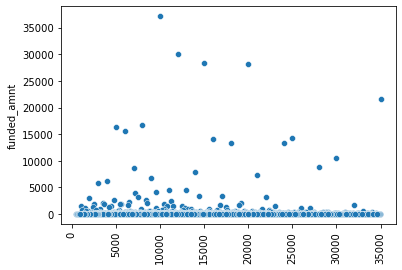

Graph for Term: Total = 2


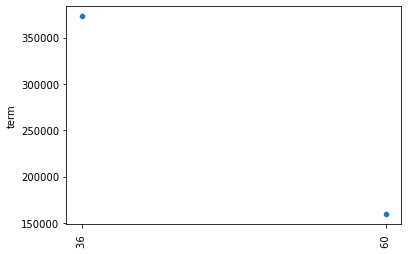

Graph for Int_rate: Total = 535


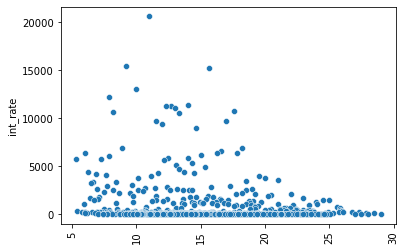

Graph for Grade: Total = 7


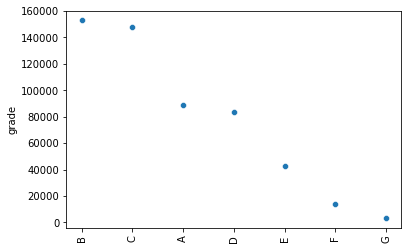

Graph for Home_ownership: Total = 6


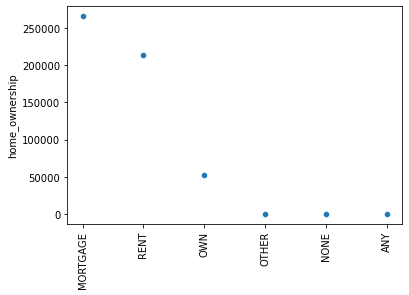

Graph for Annual_inc: Total = 33988


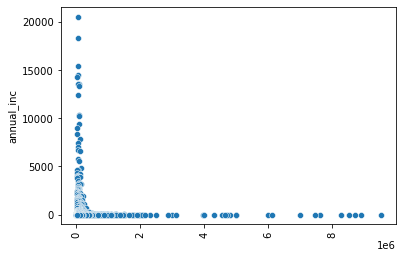

Graph for Verification_status: Total = 2


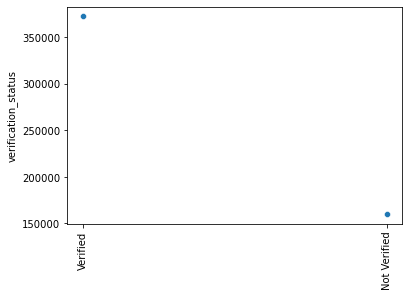

Graph for Purpose: Total = 14


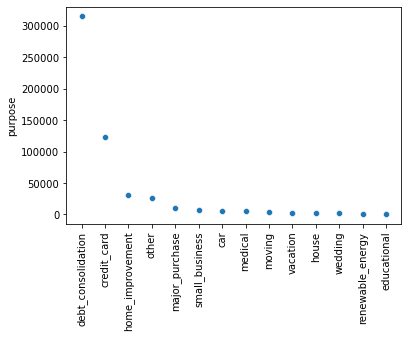

Graph for Dti: Total = 4058


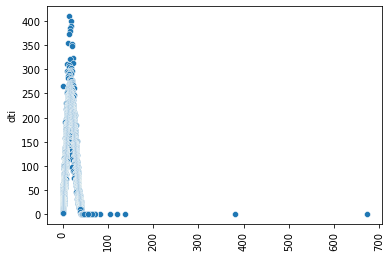

Graph for Delinq_2yrs: Total = 26


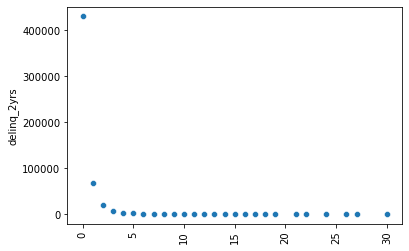

Graph for Inq_last_6mths: Total = 23


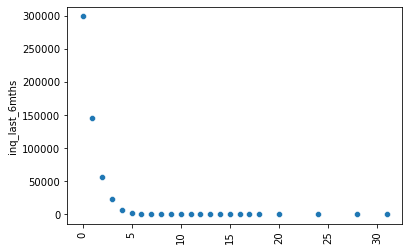

Graph for Mths_since_last_delinq: Total = 147


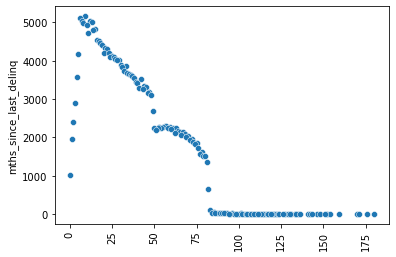

Graph for Mths_since_last_record: Total = 122


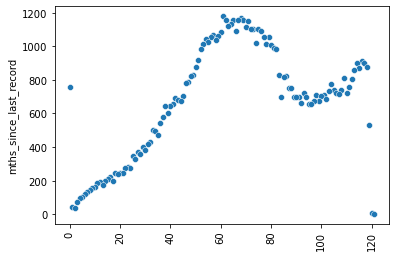

Graph for Open_acc: Total = 73


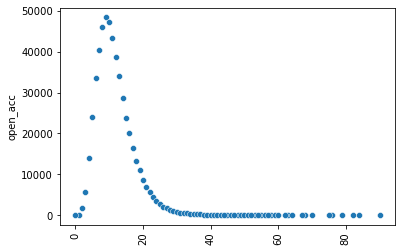

Graph for Pub_rec: Total = 28


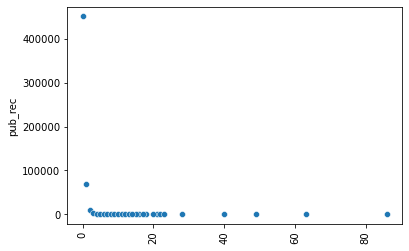

Graph for Revol_bal: Total = 63459


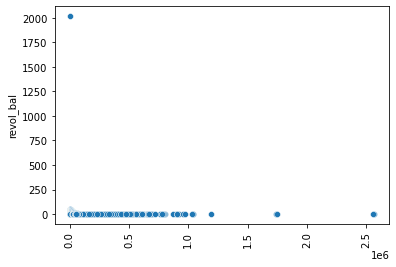

Graph for Revol_util: Total = 1265


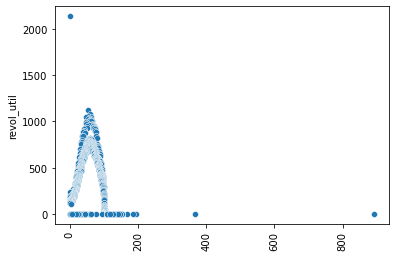

Graph for Total_acc: Total = 126


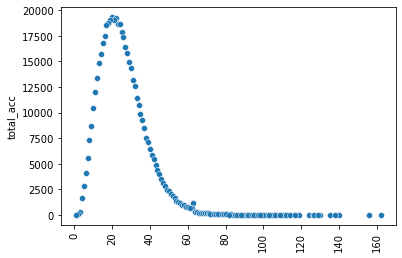

Graph for Initial_list_status: Total = 2


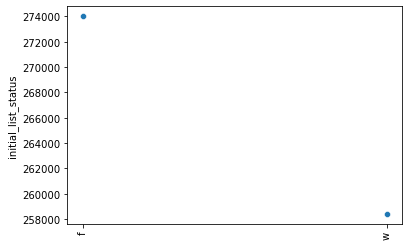

Graph for Total_rec_int: Total = 243149


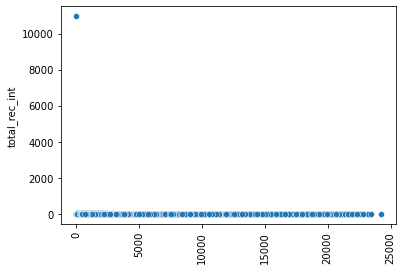

Graph for Total_rec_late_fee: Total = 4073


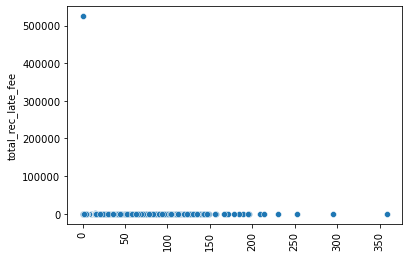

Graph for Recoveries: Total = 14024


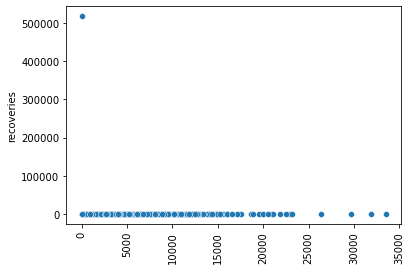

Graph for Collection_recovery_fee: Total = 12617


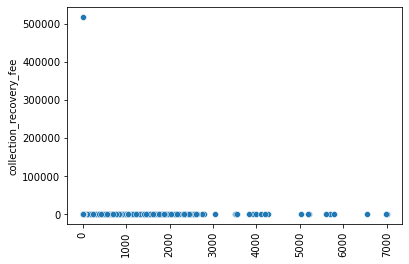

Graph for Collections_12_mths_ex_med: Total = 9


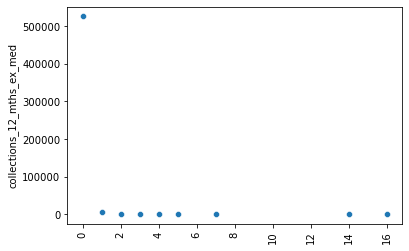

Graph for Mths_since_last_major_derog: Total = 162


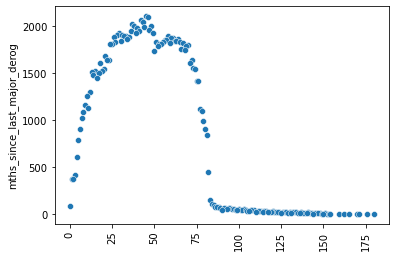

Graph for Acc_now_delinq: Total = 8


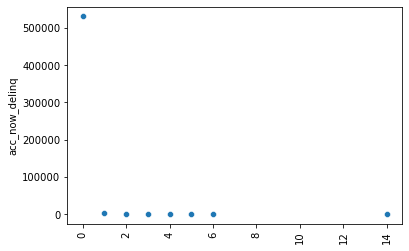

Graph for Tot_coll_amt: Total = 8081


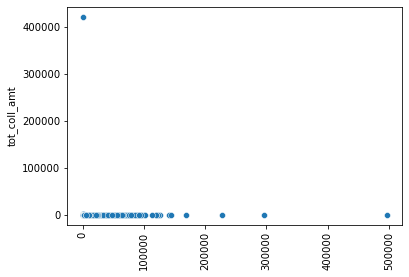

Graph for Tot_cur_bal: Total = 251640


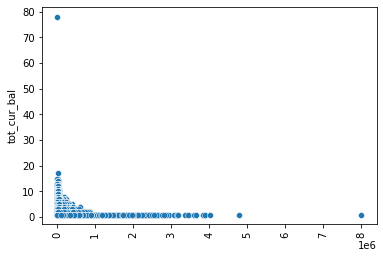

Graph for Loan_status: Total = 2


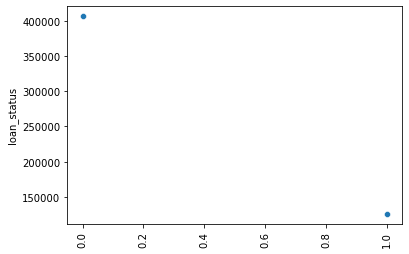

In [7]:
# Function to plot scatterplots
# EDA process
def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print('Graph for {}: Total = {}'.format(i.capitalize(), len(cat_num)))
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
plot_scatterplots()

In [8]:
#remove outliers for annual_inc (over 2 mil)

# loan_data = loan_data[loan_data.annual_inc < 2000000]

In [9]:
#Purpose and home_ownership - select the 'important' data only
loan_data = loan_data[(loan_data['home_ownership'].isin(['MORTGAGE','OWN','RENT', 'OTHER', 'NONE']))][columns_to_select].reset_index().drop('index', axis=1)

In [10]:
loan_data['purpose']=loan_data['purpose'].replace(['educatio0l', 'major_purchase', 'car', 'medical', 'vacation', 'wedding', 'educational'], 'personal_loan')

loan_data['purpose']=loan_data['purpose'].replace(['home_improvement', 'house', 'moving'], 'home')

loan_data['purpose']=loan_data['purpose'].replace(['renewable_energy', 'small_business'], 'other')

loan_data.purpose.value_counts()

debt_consolidation    314987
credit_card           123670
home                   36500
other                  32128
personal_loan          25140
Name: purpose, dtype: int64

In [11]:
#Label Encoding
#creating an instance of labelencoder
labelencoder = LabelEncoder()

#Assigning numerical values and storing it in another column
loan_data['grade'] = labelencoder.fit_transform(loan_data['grade'])
loan_data['verification_status'] = labelencoder.fit_transform(loan_data['verification_status'])
loan_data['initial_list_status'] = labelencoder.fit_transform(loan_data['initial_list_status'])
loan_data['home_ownership'] = labelencoder.fit_transform(loan_data['home_ownership'])
loan_data['purpose'] = labelencoder.fit_transform(loan_data['purpose'])

loan_data

,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,14350,36,19.19,4,3,28700.0,1,1,33.88,0.0,...,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,0
1,4800,36,10.99,1,0,65000.0,1,2,3.64,0.0,...,83.95,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9974.0,0
2,10000,36,7.26,0,3,45000.0,0,1,18.42,0.0,...,56.47,0.0,0.0,0.0,0.0,NaN,0.0,65.0,38295.0,0
3,15000,36,19.72,3,4,105000.0,0,1,14.97,0.0,...,4858.62,0.0,0.0,0.0,0.0,NaN,0.0,0.0,55564.0,0
4,16000,36,10.64,1,4,52000.0,1,0,20.16,0.0,...,2296.41,0.0,0.0,0.0,0.0,NaN,0.0,0.0,47159.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532420,20000,36,12.49,1,0,75000.0,1,1,14.53,0.0,...,2595.45,0.0,0.0,0.0,0.0,NaN,0.0,0.0,83087.0,0
532421,12000,60,14.99,2,0,59000.0,0,1,22.97,0.0,...,2182.92,0.0,0.0,0.0,0.0,NaN,0.0,0.0,227812.0,0
532422,18725,60,20.80,4,4,42504.0,1,1,27.27,0.0,...,645.32,0.0,0.0,0.0,0.0,NaN,0.0,0.0,26010.0,1
532423,21000,60,16.29,3,4,50000.0,1,0,14.91,0.0,...,4619.79,0.0,0.0,0.0,0.0,NaN,0.0,0.0,29197.0,0


<AxesSubplot:>

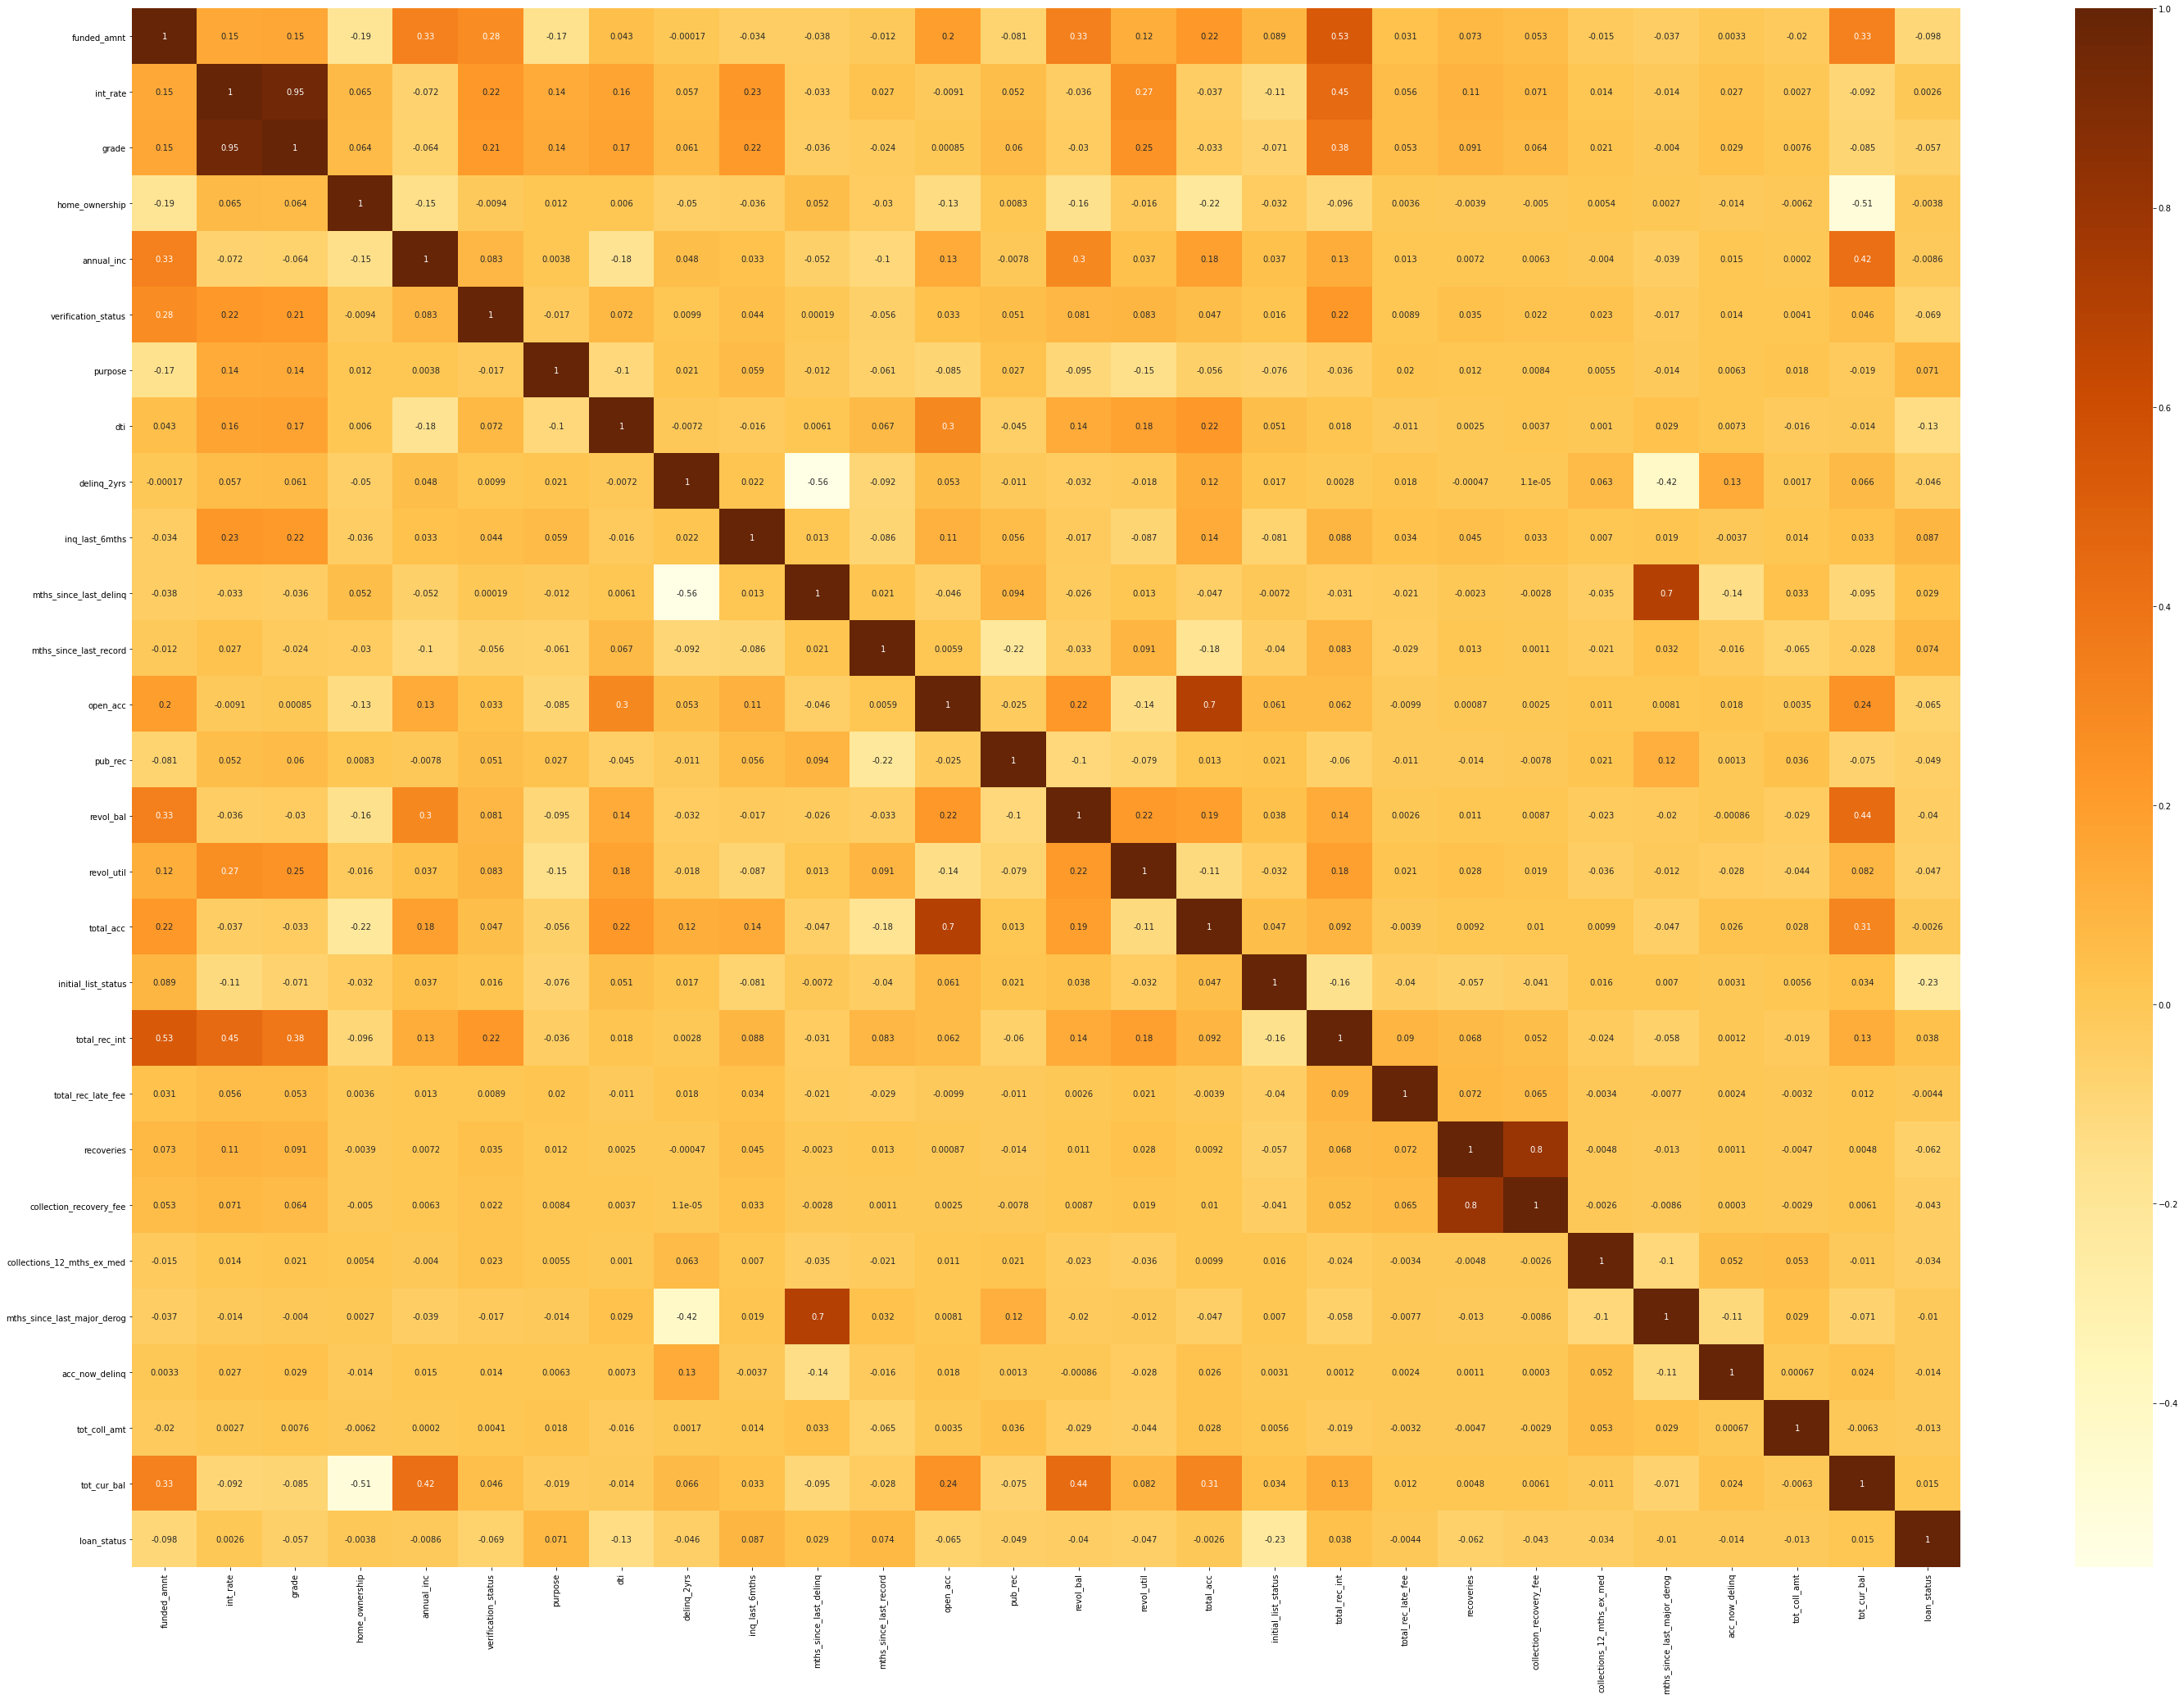

In [12]:
plt.figure(figsize=(50,35))
sns.heatmap(loan_data.corr(), cmap='YlOrBr', annot=True)

In [13]:
loan_data.corr()["funded_amnt"].sort_values(ascending=False)

funded_amnt                    1.000000
total_rec_int                  0.531622
revol_bal                      0.333785
annual_inc                     0.330494
tot_cur_bal                    0.327953
verification_status            0.278221
total_acc                      0.220598
open_acc                       0.198079
grade                          0.150595
int_rate                       0.145220
revol_util                     0.120511
initial_list_status            0.088720
recoveries                     0.072896
collection_recovery_fee        0.052797
dti                            0.042698
total_rec_late_fee             0.031022
acc_now_delinq                 0.003298
delinq_2yrs                   -0.000169
mths_since_last_record        -0.012119
collections_12_mths_ex_med    -0.014662
tot_coll_amt                  -0.019993
inq_last_6mths                -0.034297
mths_since_last_major_derog   -0.037246
mths_since_last_delinq        -0.038061
pub_rec                       -0.080612


In [14]:
loan_data = loan_data[loan_data['loan_status'] == 0]

<h1>1. Fill NaN with 0</h1>

In [15]:
fillZero = loan_data.copy()

In [16]:
fillZero.isnull().sum()

funded_amnt                         0
term                                0
int_rate                            0
grade                               0
home_ownership                      0
annual_inc                          0
verification_status                 0
purpose                             0
dti                                 0
delinq_2yrs                         3
inq_last_6mths                      3
mths_since_last_delinq         202594
mths_since_last_record         340496
open_acc                            3
pub_rec                             3
revol_bal                           0
revol_util                        188
total_acc                           3
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         23
mths_since_last_major_derog    296844
acc_now_delinq                      3
tot_coll_amt

In [17]:
cols_Zero = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal']
    
for col in cols_Zero:
    print('Imputation with Zero: %s' % (col))
    fillZero[col].fillna(0, inplace=True)

Imputation with Zero: mths_since_last_delinq
Imputation with Zero: mths_since_last_record
Imputation with Zero: mths_since_last_major_derog
Imputation with Zero: tot_coll_amt
Imputation with Zero: tot_cur_bal


In [18]:
fillZero = fillZero.dropna(axis=0)
fillZero

,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,14350,36,19.19,4,3,28700.0,1,1,33.88,0.0,...,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,0
1,4800,36,10.99,1,0,65000.0,1,2,3.64,0.0,...,83.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9974.0,0
2,10000,36,7.26,0,3,45000.0,0,1,18.42,0.0,...,56.47,0.0,0.0,0.0,0.0,0.0,0.0,65.0,38295.0,0
3,15000,36,19.72,3,4,105000.0,0,1,14.97,0.0,...,4858.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55564.0,0
4,16000,36,10.64,1,4,52000.0,1,0,20.16,0.0,...,2296.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47159.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532418,13000,60,12.99,2,0,55000.0,1,1,4.65,1.0,...,1916.77,0.0,0.0,0.0,0.0,7.0,0.0,0.0,11231.0,0
532420,20000,36,12.49,1,0,75000.0,1,1,14.53,0.0,...,2595.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83087.0,0
532421,12000,60,14.99,2,0,59000.0,0,1,22.97,0.0,...,2182.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227812.0,0
532423,21000,60,16.29,3,4,50000.0,1,0,14.91,0.0,...,4619.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29197.0,0


In [19]:
fillZero.isnull().sum()

funded_amnt                    0
term                           0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
loan_status                    0
dtype: int64

In [20]:
fillZero_X = fillZero.iloc[:,1:].values
fillZero_y = fillZero.iloc[:,0].values

# can tune parameters accordingly for experimentation
fillZero_X_train, fillZero_X_test, fillZero_y_train, fillZero_y_test = train_test_split(fillZero_X, fillZero_y, test_size=0.2, random_state = 42)

#Training - 80% | Testing - 20%

In [21]:
print('Training Features Shape:', fillZero_X_train.shape)
print('Training Labels Shape:', fillZero_y_train.shape)
print('Testing Features Shape:', fillZero_X_test.shape)
print('Testing Labels Shape:', fillZero_y_test.shape)

Training Features Shape: (325114, 28)
Training Labels Shape: (325114,)
Testing Features Shape: (81279, 28)
Testing Labels Shape: (81279,)


In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 100 decision trees
fillZero_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
fillZero_rf.fit(fillZero_X_train, fillZero_y_train);

In [23]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print(f"MAE: {mean_absolute_error(test_labels, predictions)}")
    print(f"MSE: {mean_squared_error(test_labels, predictions)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(test_labels, predictions))}")
    print(f"R-squared score for train: {model.score(fillZero_X_train, fillZero_y_train)}")
    print(f"R-squared score for test: {model.score(test_features, test_labels)}")
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [24]:
fillZero_accuracy=evaluate(fillZero_rf,fillZero_X_test,fillZero_y_test)

Model Performance
MAE: 3318.8002866669126
MSE: 20507202.729571905
RMSE: 4528.487907632293
R-squared score for train: 0.960074356449688
R-squared score for test: 0.7147054541994429
Average Error: 3318.8003 degrees.
Accuracy = 68.76%.


In [25]:
fillZero_feature_list = list(fillZero.iloc[:,1:].columns)

In [26]:
# Get numerical feature importances
fillZero_importances = list(fillZero_rf.feature_importances_)

# List of tuples with variable and importance
fillZero_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fillZero_feature_list, fillZero_importances)]

# Sort the feature importances by most important first
fillZero_feature_importances = sorted(fillZero_feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in fillZero_feature_importances];

Variable: total_rec_int        Importance: 0.3
Variable: annual_inc           Importance: 0.16
Variable: revol_bal            Importance: 0.16
Variable: term                 Importance: 0.06
Variable: int_rate             Importance: 0.06
Variable: revol_util           Importance: 0.04
Variable: dti                  Importance: 0.03
Variable: tot_cur_bal          Importance: 0.03
Variable: verification_status  Importance: 0.02
Variable: purpose              Importance: 0.02
Variable: open_acc             Importance: 0.02
Variable: total_acc            Importance: 0.02
Variable: grade                Importance: 0.01
Variable: inq_last_6mths       Importance: 0.01
Variable: mths_since_last_delinq Importance: 0.01
Variable: initial_list_status  Importance: 0.01
Variable: mths_since_last_major_derog Importance: 0.01
Variable: home_ownership       Importance: 0.0
Variable: delinq_2yrs          Importance: 0.0
Variable: mths_since_last_record Importance: 0.0
Variable: pub_rec              Im

In [27]:
# New random forest with only the two most important variables
fillZero_rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=42)

# Extract the 15 most important features
fillZero_important_indices = [fillZero_feature_list.index('total_rec_int'), fillZero_feature_list.index('annual_inc'), fillZero_feature_list.index('revol_bal'), fillZero_feature_list.index('term'), fillZero_feature_list.index('int_rate'), fillZero_feature_list.index('revol_util'), fillZero_feature_list.index('dti'), fillZero_feature_list.index('tot_cur_bal'), fillZero_feature_list.index('verification_status'), fillZero_feature_list.index('purpose'), fillZero_feature_list.index('open_acc'), fillZero_feature_list.index('total_acc'), fillZero_feature_list.index('grade'), fillZero_feature_list.index('inq_last_6mths'), fillZero_feature_list.index('mths_since_last_delinq')]
fillZero_train_important = fillZero_X_train[:, fillZero_important_indices]
fillZero_test_important = fillZero_X_test[:, fillZero_important_indices]

# Train the random forest
fillZero_rf_most_important.fit(fillZero_train_important, fillZero_y_train)

# Make predictions and determine the error
fillZero_predictions = fillZero_rf_most_important.predict(fillZero_test_important)
fillZero_errors = abs(fillZero_predictions - fillZero_y_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(fillZero_errors), 2))
fillZero_mape = np.mean(100 * (fillZero_errors / fillZero_y_test))
fillZero_accuracy = 100 - fillZero_mape

print('Accuracy:', round(fillZero_accuracy, 2), '%.')

Mean Absolute Error: 3347.3
Accuracy: 68.34 %.


<h1>2. Fill NaN with Median</h1>

In [28]:
fillMedian = loan_data.copy()

In [29]:
fillMedian.isnull().sum()

funded_amnt                         0
term                                0
int_rate                            0
grade                               0
home_ownership                      0
annual_inc                          0
verification_status                 0
purpose                             0
dti                                 0
delinq_2yrs                         3
inq_last_6mths                      3
mths_since_last_delinq         202594
mths_since_last_record         340496
open_acc                            3
pub_rec                             3
revol_bal                           0
revol_util                        188
total_acc                           3
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         23
mths_since_last_major_derog    296844
acc_now_delinq                      3
tot_coll_amt

In [30]:
cols_Median = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
cols_0 = ['tot_coll_amt', 'tot_cur_bal']

for col in cols_Median:
    print('Imputation with Median: %s' % (col))
    fillMedian[col].fillna(fillMedian[col].median(), inplace=True)
    
for col in cols_0:
    print('Imputation with 0: %s' % (col))
    fillMedian[col].fillna(0, inplace=True)


Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: mths_since_last_major_derog
Imputation with 0: tot_coll_amt
Imputation with 0: tot_cur_bal


In [31]:
fillMedian = fillMedian.dropna(axis=0)
fillMedian

,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,14350,36,19.19,4,3,28700.0,1,1,33.88,0.0,...,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,0
1,4800,36,10.99,1,0,65000.0,1,2,3.64,0.0,...,83.95,0.0,0.0,0.0,0.0,44.0,0.0,0.0,9974.0,0
2,10000,36,7.26,0,3,45000.0,0,1,18.42,0.0,...,56.47,0.0,0.0,0.0,0.0,44.0,0.0,65.0,38295.0,0
3,15000,36,19.72,3,4,105000.0,0,1,14.97,0.0,...,4858.62,0.0,0.0,0.0,0.0,44.0,0.0,0.0,55564.0,0
4,16000,36,10.64,1,4,52000.0,1,0,20.16,0.0,...,2296.41,0.0,0.0,0.0,0.0,44.0,0.0,0.0,47159.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532418,13000,60,12.99,2,0,55000.0,1,1,4.65,1.0,...,1916.77,0.0,0.0,0.0,0.0,7.0,0.0,0.0,11231.0,0
532420,20000,36,12.49,1,0,75000.0,1,1,14.53,0.0,...,2595.45,0.0,0.0,0.0,0.0,44.0,0.0,0.0,83087.0,0
532421,12000,60,14.99,2,0,59000.0,0,1,22.97,0.0,...,2182.92,0.0,0.0,0.0,0.0,44.0,0.0,0.0,227812.0,0
532423,21000,60,16.29,3,4,50000.0,1,0,14.91,0.0,...,4619.79,0.0,0.0,0.0,0.0,44.0,0.0,0.0,29197.0,0


In [32]:
fillMedian.isnull().sum()

funded_amnt                    0
term                           0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
loan_status                    0
dtype: int64

In [33]:
fillMedian_X = fillMedian.iloc[:,1:].values
fillMedian_y = fillMedian.iloc[:,0].values

# can tune parameters accordingly for experimentation
fillMedian_X_train, fillMedian_X_test, fillMedian_y_train, fillMedian_y_test = train_test_split(fillMedian_X, fillMedian_y, test_size=0.2, random_state = 42)

#Training - 80% | Testing - 20%

In [34]:
print('Training Features Shape:', fillMedian_X_train.shape)
print('Training Labels Shape:', fillMedian_y_train.shape)
print('Testing Features Shape:', fillMedian_X_test.shape)
print('Testing Labels Shape:', fillMedian_y_test.shape)

Training Features Shape: (325114, 28)
Training Labels Shape: (325114,)
Testing Features Shape: (81279, 28)
Testing Labels Shape: (81279,)


In [35]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print(f"MAE: {mean_absolute_error(test_labels, predictions)}")
    print(f"MSE: {mean_squared_error(test_labels, predictions)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(test_labels, predictions))}")
    print(f"R-squared score for train: {model.score(fillMedian_X_train, fillMedian_y_train)}")
    print(f"R-squared score for test: {model.score(test_features, test_labels)}")
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [36]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 200 decision trees
# rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
fillMedian_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
fillMedian_rf.fit(fillMedian_X_train, fillMedian_y_train);

In [37]:
fillMedian_accuracy=evaluate(fillMedian_rf,fillMedian_X_test,fillMedian_y_test)

Model Performance
MAE: 3315.3817683534494
MSE: 20486061.760695413
RMSE: 4526.153086307998
R-squared score for train: 0.9601317624382859
R-squared score for test: 0.7149995656486219
Average Error: 3315.3818 degrees.
Accuracy = 68.80%.


In [38]:
fillMedian_feature_list = list(fillMedian.iloc[:,1:].columns)

In [39]:
# Get numerical feature importances
fillMedian_importances = list(fillMedian_rf.feature_importances_)

# List of tuples with variable and importance
fillMedian_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fillMedian_feature_list, fillMedian_importances)]

# Sort the feature importances by most important first
fillMedian_feature_importances = sorted(fillMedian_feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in fillMedian_feature_importances];

Variable: total_rec_int        Importance: 0.3
Variable: annual_inc           Importance: 0.16
Variable: revol_bal            Importance: 0.16
Variable: term                 Importance: 0.06
Variable: int_rate             Importance: 0.06
Variable: revol_util           Importance: 0.04
Variable: dti                  Importance: 0.03
Variable: tot_cur_bal          Importance: 0.03
Variable: verification_status  Importance: 0.02
Variable: purpose              Importance: 0.02
Variable: open_acc             Importance: 0.02
Variable: total_acc            Importance: 0.02
Variable: grade                Importance: 0.01
Variable: inq_last_6mths       Importance: 0.01
Variable: mths_since_last_delinq Importance: 0.01
Variable: initial_list_status  Importance: 0.01
Variable: mths_since_last_major_derog Importance: 0.01
Variable: home_ownership       Importance: 0.0
Variable: delinq_2yrs          Importance: 0.0
Variable: mths_since_last_record Importance: 0.0
Variable: pub_rec              Im

In [40]:
# New random forest with only the two most important variables
fillMedian_rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=42)

# Extract the 15 most important features
fillMedian_important_indices = [fillMedian_feature_list.index('total_rec_int'), fillMedian_feature_list.index('annual_inc'), fillMedian_feature_list.index('revol_bal'), fillMedian_feature_list.index('term'), fillMedian_feature_list.index('int_rate'), fillMedian_feature_list.index('revol_util'), fillMedian_feature_list.index('dti'), fillMedian_feature_list.index('tot_cur_bal'), fillMedian_feature_list.index('verification_status'), fillMedian_feature_list.index('purpose'), fillMedian_feature_list.index('open_acc'), fillMedian_feature_list.index('total_acc'), fillMedian_feature_list.index('grade'), fillMedian_feature_list.index('inq_last_6mths'), fillMedian_feature_list.index('mths_since_last_delinq')]
fillMedian_train_important = fillMedian_X_train[:, fillMedian_important_indices]
fillMedian_test_important = fillMedian_X_test[:, fillMedian_important_indices]

# Train the random forest
fillMedian_rf_most_important.fit(fillMedian_train_important, fillMedian_y_train)

# Make predictions and determine the error
fillMedian_predictions = fillMedian_rf_most_important.predict(fillMedian_test_important)
fillMedian_errors = abs(fillMedian_predictions - fillMedian_y_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(fillMedian_errors), 2))
fillMedian_mape = np.mean(100 * (fillMedian_errors / fillMedian_y_test))
fillMedian_accuracy = 100 - fillMedian_mape

print('Accuracy:', round(fillMedian_accuracy, 2), '%.')

Mean Absolute Error: 3346.07
Accuracy: 68.36 %.


<h1>3. Fill NaN with x2</h1>

In [41]:
fillx2 = loan_data.copy()

In [42]:
fillx2.isnull().sum()

funded_amnt                         0
term                                0
int_rate                            0
grade                               0
home_ownership                      0
annual_inc                          0
verification_status                 0
purpose                             0
dti                                 0
delinq_2yrs                         3
inq_last_6mths                      3
mths_since_last_delinq         202594
mths_since_last_record         340496
open_acc                            3
pub_rec                             3
revol_bal                           0
revol_util                        188
total_acc                           3
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         23
mths_since_last_major_derog    296844
acc_now_delinq                      3
tot_coll_amt

In [43]:
cols_x2 = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
cols_0 = ['tot_coll_amt', 'tot_cur_bal']

for col in cols_x2:
    print('Imputation with Max x2: %s' % (col))
    fillx2[col].fillna(fillx2[col].max() * 2, inplace=True)
    
for col in cols_0:
    print('Imputation with 0: %s' % (col))
    fillx2[col].fillna(0, inplace=True)

Imputation with Max x2: mths_since_last_delinq
Imputation with Max x2: mths_since_last_record
Imputation with Max x2: mths_since_last_major_derog
Imputation with 0: tot_coll_amt
Imputation with 0: tot_cur_bal


In [44]:
fillx2 = fillx2.dropna(axis=0)
fillx2

,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,14350,36,19.19,4,3,28700.0,1,1,33.88,0.0,...,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,0
1,4800,36,10.99,1,0,65000.0,1,2,3.64,0.0,...,83.95,0.0,0.0,0.0,0.0,360.0,0.0,0.0,9974.0,0
2,10000,36,7.26,0,3,45000.0,0,1,18.42,0.0,...,56.47,0.0,0.0,0.0,0.0,360.0,0.0,65.0,38295.0,0
3,15000,36,19.72,3,4,105000.0,0,1,14.97,0.0,...,4858.62,0.0,0.0,0.0,0.0,360.0,0.0,0.0,55564.0,0
4,16000,36,10.64,1,4,52000.0,1,0,20.16,0.0,...,2296.41,0.0,0.0,0.0,0.0,360.0,0.0,0.0,47159.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532418,13000,60,12.99,2,0,55000.0,1,1,4.65,1.0,...,1916.77,0.0,0.0,0.0,0.0,7.0,0.0,0.0,11231.0,0
532420,20000,36,12.49,1,0,75000.0,1,1,14.53,0.0,...,2595.45,0.0,0.0,0.0,0.0,360.0,0.0,0.0,83087.0,0
532421,12000,60,14.99,2,0,59000.0,0,1,22.97,0.0,...,2182.92,0.0,0.0,0.0,0.0,360.0,0.0,0.0,227812.0,0
532423,21000,60,16.29,3,4,50000.0,1,0,14.91,0.0,...,4619.79,0.0,0.0,0.0,0.0,360.0,0.0,0.0,29197.0,0


In [45]:
fillx2.isnull().sum()

funded_amnt                    0
term                           0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
loan_status                    0
dtype: int64

In [46]:
fillx2_X = fillx2.iloc[:,1:].values
fillx2_y = fillx2.iloc[:,0].values

# can tune parameters accordingly for experimentation
fillx2_X_train, fillx2_X_test, fillx2_y_train, fillx2_y_test = train_test_split(fillx2_X, fillx2_y, test_size=0.2, random_state = 42)

#Training - 80% | Testing - 20%

In [47]:
print('Training Features Shape:', fillx2_X_train.shape)
print('Training Labels Shape:', fillx2_y_train.shape)
print('Testing Features Shape:', fillx2_X_test.shape)
print('Testing Labels Shape:', fillx2_y_test.shape)

Training Features Shape: (325114, 28)
Training Labels Shape: (325114,)
Testing Features Shape: (81279, 28)
Testing Labels Shape: (81279,)


In [48]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 100 decision trees
fillx2_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
fillx2_rf.fit(fillx2_X_train, fillx2_y_train);

In [49]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print(f"MAE: {mean_absolute_error(test_labels, predictions)}")
    print(f"MSE: {mean_squared_error(test_labels, predictions)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(test_labels, predictions))}")
    print(f"R-squared score for train: {model.score(fillx2_X_train, fillx2_y_train)}")
    print(f"R-squared score for test: {model.score(test_features, test_labels)}")
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [50]:
fillx2_accuracy=evaluate(fillx2_rf,fillx2_X_test,fillx2_y_test)

Model Performance
MAE: 3317.4325748348283
MSE: 20490312.585345693
RMSE: 4526.622646669997
R-squared score for train: 0.9601173883145803
R-squared score for test: 0.7149404285198837
Average Error: 3317.4326 degrees.
Accuracy = 68.76%.


In [51]:
fillx2_feature_list = list(fillx2.iloc[:,1:].columns)

In [52]:
# Get numerical feature importances
fillx2_importances = list(fillx2_rf.feature_importances_)

# List of tuples with variable and importance
fillx2_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fillx2_feature_list, fillx2_importances)]

# Sort the feature importances by most important first
fillx2_feature_importances = sorted(fillx2_feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in fillx2_feature_importances];

Variable: total_rec_int        Importance: 0.3
Variable: annual_inc           Importance: 0.16
Variable: revol_bal            Importance: 0.16
Variable: term                 Importance: 0.06
Variable: int_rate             Importance: 0.06
Variable: revol_util           Importance: 0.04
Variable: dti                  Importance: 0.03
Variable: tot_cur_bal          Importance: 0.03
Variable: verification_status  Importance: 0.02
Variable: purpose              Importance: 0.02
Variable: open_acc             Importance: 0.02
Variable: total_acc            Importance: 0.02
Variable: grade                Importance: 0.01
Variable: inq_last_6mths       Importance: 0.01
Variable: mths_since_last_delinq Importance: 0.01
Variable: initial_list_status  Importance: 0.01
Variable: mths_since_last_major_derog Importance: 0.01
Variable: home_ownership       Importance: 0.0
Variable: delinq_2yrs          Importance: 0.0
Variable: mths_since_last_record Importance: 0.0
Variable: pub_rec              Im

In [53]:
# New random forest with only the two most important variables
fillx2_rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=42)

# Extract the 15 most important features
fillx2_important_indices = [fillx2_feature_list.index('total_rec_int'), fillx2_feature_list.index('annual_inc'), fillx2_feature_list.index('revol_bal'), fillx2_feature_list.index('term'), fillx2_feature_list.index('int_rate'), fillx2_feature_list.index('revol_util'), fillx2_feature_list.index('dti'), fillx2_feature_list.index('tot_cur_bal'), fillx2_feature_list.index('verification_status'), fillx2_feature_list.index('purpose'), fillx2_feature_list.index('open_acc'), fillx2_feature_list.index('mths_since_last_record'), fillx2_feature_list.index('grade'), fillx2_feature_list.index('inq_last_6mths'), fillx2_feature_list.index('mths_since_last_delinq')]
fillx2_train_important = fillx2_X_train[:, fillx2_important_indices]
fillx2_test_important = fillx2_X_test[:, fillx2_important_indices]

# Train the random forest
fillx2_rf_most_important.fit(fillx2_train_important, fillx2_y_train)

# Make predictions and determine the error
fillx2_predictions = fillx2_rf_most_important.predict(fillx2_test_important)
fillx2_errors = abs(fillx2_predictions - fillx2_y_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(fillx2_errors), 2))
fillx2_mape = np.mean(100 * (fillx2_errors / fillx2_y_test))
fillx2_accuracy = 100 - fillx2_mape

print('Accuracy:', round(fillx2_accuracy, 2), '%.')

Mean Absolute Error: 3337.8
Accuracy: 68.44 %.


<h1>4. Fill NaN by remove</h1>

In [54]:
fillRemove = loan_data.copy()

In [55]:
fillRemove.isnull().sum()

funded_amnt                         0
term                                0
int_rate                            0
grade                               0
home_ownership                      0
annual_inc                          0
verification_status                 0
purpose                             0
dti                                 0
delinq_2yrs                         3
inq_last_6mths                      3
mths_since_last_delinq         202594
mths_since_last_record         340496
open_acc                            3
pub_rec                             3
revol_bal                           0
revol_util                        188
total_acc                           3
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         23
mths_since_last_major_derog    296844
acc_now_delinq                      3
tot_coll_amt

In [56]:
fillRemove = fillRemove.dropna(axis=0)
fillRemove

,funded_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,14350,36,19.19,4,3,28700.00,1,1,33.88,0.0,...,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,0
52,20000,36,12.69,2,3,160000.00,1,2,4.10,1.0,...,1538.96,0.0,0.0,0.0,0.0,66.0,0.0,805.0,234697.0,0
72,7200,36,14.48,2,4,39750.00,1,1,19.66,0.0,...,81.09,0.0,0.0,0.0,0.0,26.0,0.0,0.0,58396.0,0
80,5000,36,12.69,2,0,77000.00,1,0,14.50,2.0,...,295.25,0.0,0.0,0.0,0.0,89.0,0.0,0.0,174517.0,0
100,6000,36,12.29,2,3,75000.00,0,1,16.70,0.0,...,338.91,0.0,0.0,0.0,0.0,47.0,0.0,0.0,78372.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532208,5000,36,13.99,2,0,55000.00,0,1,24.59,0.0,...,381.88,0.0,0.0,0.0,0.0,31.0,0.0,1247.0,158818.0,0
532243,21600,60,8.18,1,0,74300.00,0,2,10.82,0.0,...,277.77,0.0,0.0,0.0,0.0,40.0,0.0,0.0,118934.0,0
532260,35000,36,18.49,4,3,150000.00,1,2,8.50,4.0,...,503.34,0.0,0.0,0.0,0.0,10.0,0.0,0.0,93871.0,0
532376,10300,36,14.65,2,4,47839.44,1,1,25.56,0.0,...,591.98,0.0,0.0,0.0,0.0,52.0,0.0,0.0,15111.0,0


In [57]:
fillRemove.isnull().sum()

funded_amnt                    0
term                           0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
loan_status                    0
dtype: int64

In [58]:
fillRemove_X = fillRemove.iloc[:,1:].values
fillRemove_y = fillRemove.iloc[:,0].values

# can tune parameters accordingly for experimentation
fillRemove_X_train, fillRemove_X_test, fillRemove_y_train, fillRemove_y_test = train_test_split(fillRemove_X, fillRemove_y, test_size=0.2, random_state = 42)

#Training - 80% | Testing - 20%

In [59]:
print('Training Features Shape:', fillRemove_X_train.shape)
print('Training Labels Shape:', fillRemove_y_train.shape)
print('Testing Features Shape:', fillRemove_X_test.shape)
print('Testing Labels Shape:', fillRemove_y_test.shape)

Training Features Shape: (16589, 28)
Training Labels Shape: (16589,)
Testing Features Shape: (4148, 28)
Testing Labels Shape: (4148,)


In [60]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 200 decision trees
fillRemove_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
fillRemove_rf.fit(fillRemove_X_train, fillRemove_y_train);

In [61]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print(f"MAE: {mean_absolute_error(test_labels, predictions)}")
    print(f"MSE: {mean_squared_error(test_labels, predictions)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(test_labels, predictions))}")
    print(f"R-squared score for train: {model.score(fillRemove_X_train, fillRemove_y_train)}")
    print(f"R-squared score for test: {model.score(test_features, test_labels)}")
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [62]:
fillRemove_accuracy=evaluate(fillRemove_rf,fillRemove_X_test,fillRemove_y_test)

Model Performance
MAE: 3427.1020371263257
MSE: 21652968.783615597
RMSE: 4653.275059956761
R-squared score for train: 0.9471401548209768
R-squared score for test: 0.6230085283112068
Average Error: 3427.1020 degrees.
Accuracy = 63.23%.


In [63]:
fillRemove_feature_list = list(fillRemove.iloc[:,1:].columns)

In [64]:
# Get numerical feature importances
fillRemove_importances = list(fillRemove_rf.feature_importances_)

# List of tuples with variable and importance
fillRemove_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fillRemove_feature_list, fillRemove_importances)]

# Sort the feature importances by most important first
fillRemove_feature_importances = sorted(fillRemove_feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in fillRemove_feature_importances];

Variable: total_rec_int        Importance: 0.34
Variable: annual_inc           Importance: 0.15
Variable: term                 Importance: 0.11
Variable: revol_bal            Importance: 0.08
Variable: int_rate             Importance: 0.05
Variable: dti                  Importance: 0.03
Variable: mths_since_last_record Importance: 0.03
Variable: revol_util           Importance: 0.03
Variable: tot_cur_bal          Importance: 0.03
Variable: mths_since_last_delinq Importance: 0.02
Variable: open_acc             Importance: 0.02
Variable: total_acc            Importance: 0.02
Variable: mths_since_last_major_derog Importance: 0.02
Variable: grade                Importance: 0.01
Variable: purpose              Importance: 0.01
Variable: inq_last_6mths       Importance: 0.01
Variable: pub_rec              Importance: 0.01
Variable: tot_coll_amt         Importance: 0.01
Variable: home_ownership       Importance: 0.0
Variable: verification_status  Importance: 0.0
Variable: delinq_2yrs          

In [65]:
# New random forest with only the two most important variables
fillRemove_rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=42)

# Extract the 15 most important features
fillRemove_important_indices = [fillRemove_feature_list.index('total_rec_int'), fillRemove_feature_list.index('annual_inc'), fillRemove_feature_list.index('term'), fillRemove_feature_list.index('revol_bal'), fillRemove_feature_list.index('int_rate'), fillRemove_feature_list.index('dti'), fillRemove_feature_list.index('mths_since_last_record'), fillRemove_feature_list.index('revol_util'), fillRemove_feature_list.index('tot_cur_bal'), fillRemove_feature_list.index('mths_since_last_delinq'), fillRemove_feature_list.index('open_acc'), fillRemove_feature_list.index('total_acc'), fillRemove_feature_list.index('mths_since_last_major_derog'), fillRemove_feature_list.index('grade'), fillRemove_feature_list.index('purpose')]
fillRemove_train_important = fillRemove_X_train[:, fillRemove_important_indices]
fillRemove_test_important = fillRemove_X_test[:, fillRemove_important_indices]

# Train the random forest
fillRemove_rf_most_important.fit(fillRemove_train_important, fillRemove_y_train)

# Make predictions and determine the error
fillRemove_predictions = fillRemove_rf_most_important.predict(fillRemove_test_important)
fillRemove_errors = abs(fillRemove_predictions - fillRemove_y_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(fillx2_errors), 2))
fillRemove_mape = np.mean(100 * (fillRemove_errors / fillRemove_y_test))
fillRemove_accuracy = 100 - fillRemove_mape

print('Accuracy:', round(fillRemove_accuracy, 2), '%.')

Mean Absolute Error: 3337.8
Accuracy: 62.63 %.


<h1>Result</h1>

Randon_state | Accuracy | Most Important Accuracy (Top 15 Variables)
:-:|:-:|:-:|
Fill with Zero | 68.76% | 68.34%
Fill with Median | 68.80% | 68.36%
Fill with x2 |  68.76% | 68.44%
Remove NaN row | 63.23% | 62.63%


In [ ]:
#Export the model
from joblib import dump,load
dump(fillMedian_rf_most_important,'rf_regressor.joblib')